<a href="https://colab.research.google.com/github/3BDO145/Mumbai-house-price-prediction/blob/main/Housing_Price_Data_of_Mumbai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing modules**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

**Reading dataset**

In [ ]:
mumbai_df =pd.read_csv("/content/mumbai.csv")
mumbai_df.head()

,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,22400000.0,"Chembur, Mumbai - Harbour Line, Maharashtra",629.0,19.032800,72.896357,2.0,2.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Right fr...,35612.082671
1,35000000.0,"Chembur, Mumbai - Harbour Line, Maharashtra",974.0,19.032800,72.896357,3.0,2.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Right fr...,35934.291581
2,31700000.0,"Ghatkopar East, Mumbai - Central Line, Maharas...",968.0,19.085600,72.909277,3.0,3.0,NaN,Under Construction,New Property,1.0,NaN,2.0,NaN,Flat,\n \n \n...,32747.933884
3,18700000.0,"Plot Number 283, Road Number 3, Jawahar Nagar,...",629.0,19.155756,72.846862,2.0,2.0,2.0,Ready to Move,New Property,1.0,NaN,3.0,Laxmi Callista,Flat,\n\n\n Welcome ...,29729.729730
4,13500000.0,"malad east, Malad East, Mumbai - North Mumbai,...",1090.0,19.177555,72.849887,2.0,2.0,NaN,NaN,New Property,1.0,Unfurnished,2.0,near uper govind nagar,Flat,\n \n \n...,12385.321101


**Inspecting dataframe info**

In [ ]:
mumbai_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             6255 non-null   float64
 1   Address           6255 non-null   object 
 2   area              6255 non-null   float64
 3   latitude          6255 non-null   float64
 4   longitude         6255 non-null   float64
 5   Bedrooms          6255 non-null   float64
 6   Bathrooms         6255 non-null   float64
 7   Balcony           2376 non-null   float64
 8   Status            5774 non-null   object 
 9   neworold          6255 non-null   object 
 10  parking           2129 non-null   float64
 11  Furnished_status  3600 non-null   object 
 12  Lift              1678 non-null   float64
 13  Landmarks         2617 non-null   object 
 14  type_of_building  6255 non-null   object 
 15  desc              6255 non-null   object 
 16  Price_sqft        6255 non-null   float64


**Dropping irrelevant columns**   
```Balcony```, ```parking```, ```Lift```, ```Landmarks```, ```Address```, ```desc``` are irrelevant to our analysis so they can be dropped

In [ ]:
columns_to_drop = ['Balcony', 'parking', 'Lift','Landmarks','Address','desc']

mumbai_df = mumbai_df.drop(columns=columns_to_drop)

**Dataframe after dropping columns**

In [ ]:
mumbai_df.head()

,price,area,latitude,longitude,Bedrooms,Bathrooms,Status,neworold,Furnished_status,type_of_building,Price_sqft
0,22400000.0,629.0,19.032800,72.896357,2.0,2.0,Under Construction,New Property,NaN,Flat,35612.082671
1,35000000.0,974.0,19.032800,72.896357,3.0,2.0,Under Construction,New Property,NaN,Flat,35934.291581
2,31700000.0,968.0,19.085600,72.909277,3.0,3.0,Under Construction,New Property,NaN,Flat,32747.933884
3,18700000.0,629.0,19.155756,72.846862,2.0,2.0,Ready to Move,New Property,NaN,Flat,29729.729730
4,13500000.0,1090.0,19.177555,72.849887,2.0,2.0,NaN,New Property,Unfurnished,Flat,12385.321101


**Checking for null values**

In [ ]:
mumbai_df.isnull().sum()

price                  0
area                   0
latitude               0
longitude              0
Bedrooms               0
Bathrooms              0
Status               481
neworold               0
Furnished_status    2655
type_of_building       0
Price_sqft             0
dtype: int64

**Preforming mode imputation**    
Replacing null values for ```Status```, and ```Furnished_status``` with the most frequent value

In [ ]:
# Mode impuation for Status
most_common_Status=mumbai_df['Status'].mode()[0]
mumbai_df['Status'].fillna(most_common_Status, inplace=True)

# Mode impuation for Furnished_status
most_common_Furnished_status=mumbai_df['Furnished_status'].mode()[0]
mumbai_df['Furnished_status'].fillna(most_common_Furnished_status, inplace=True)

**Dataset after impuation**

In [ ]:
mumbai_df.isnull().sum()

price               0
area                0
latitude            0
longitude           0
Bedrooms            0
Bathrooms           0
Status              0
neworold            0
Furnished_status    0
type_of_building    0
Price_sqft          0
dtype: int64

**Inspecting for outliers**

In [ ]:
mumbai_df.describe()

,price,area,latitude,longitude,Bedrooms,Bathrooms,Price_sqft
count,6.255000e+03,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000
mean,2.684187e+07,1185.625260,19.156772,72.868642,2.452278,2.425580,21422.923601
std,2.788831e+07,636.973259,0.109447,0.058614,0.749534,0.762604,12698.478665
min,1.500000e+06,503.000000,18.873713,72.754080,2.000000,0.000000,1500.000000
25%,1.300000e+07,846.500000,19.081509,72.832930,2.000000,2.000000,13709.934735
50%,1.900000e+07,1000.000000,19.147269,72.858019,2.000000,2.000000,19285.714286
75%,3.000000e+07,1300.000000,19.213054,72.884691,3.000000,3.000000,26500.000000
max,3.600000e+08,8000.000000,19.476239,73.197823,10.000000,10.000000,119047.619048


**Handling outliers**    
Several columns have maximum values substantially higher than their 75th percentile:```Price```, ```Area```, ```Bedrooms```, ```Bathrooms```, and ```Price_sqft```    
     
The IQR method will be used to deal with the ouliers within these columns

In [ ]:
# Array of columns containing outliers
columns_with_outliers = ['price', 'area', 'Bedrooms', 'Bathrooms', 'Price_sqft']

# Function to remove outiers using IQR method
def remove_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define upper and lower bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and remove outliers
    outliers = (dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)
    dataframe.drop(dataframe[outliers].index, inplace=True)

# Call handling function on columns with outliers
for column in columns_with_outliers:
    remove_outliers_iqr(mumbai_df, column)

**Dataframe description after outlier handling**

In [ ]:
mumbai_df.describe()

,price,area,latitude,longitude,Bedrooms,Bathrooms,Price_sqft
count,4.144000e+03,4144.000000,4144.000000,4144.000000,4144.000000,4144.0,4144.000000
mean,1.654248e+07,933.669643,19.175658,72.872778,2.090251,2.0,17884.486059
std,8.294451e+06,208.928425,0.109843,0.062559,0.293236,0.0,8275.464103
min,1.500000e+06,503.000000,18.903700,72.754080,2.000000,2.0,1500.000000
25%,1.050000e+07,790.000000,19.107661,72.836298,2.000000,2.0,11642.270862
50%,1.600000e+07,910.000000,19.163221,72.862941,2.000000,2.0,17651.115619
75%,2.100000e+07,1050.000000,19.230865,72.889860,2.000000,2.0,23125.000000
max,5.500000e+07,1750.000000,19.476239,73.197823,4.000000,2.0,41338.582677


**Label encoding**    
Converting columns with catagorical values to numerical values that the model can interpert.    
      
The columns ```Status```, ```neworold```, ```Furnished_status```, and  ```type_of_building``` contain catagorical values which must be encoded

In [ ]:
label_encoder = LabelEncoder()

mumbai_df['Status_encoded'] = label_encoder.fit_transform(mumbai_df['Status'])
mumbai_df['neworold_encoded'] = label_encoder.fit_transform(mumbai_df['neworold'])
mumbai_df['Furnished_status_encoded'] = label_encoder.fit_transform(mumbai_df['Furnished_status'])
mumbai_df['type_of_building_encoded'] = label_encoder.fit_transform(mumbai_df['type_of_building'])

**Removing unencoded columns**

In [ ]:
# List of original columns to be removed
columns_to_remove = ['Status', 'neworold', 'Furnished_status', 'type_of_building']

# Drop the original unencoded columns
mumbai_df.drop(columns=columns_to_remove, inplace=True)

mumbai_df.head()

,price,area,latitude,longitude,Bedrooms,Bathrooms,Price_sqft,Status_encoded,neworold_encoded,Furnished_status_encoded,type_of_building_encoded
0,22400000.0,629.0,19.032800,72.896357,2.0,2.0,35612.082671,1,0,2,0
1,35000000.0,974.0,19.032800,72.896357,3.0,2.0,35934.291581,1,0,2,0
3,18700000.0,629.0,19.155756,72.846862,2.0,2.0,29729.729730,0,0,2,0
4,13500000.0,1090.0,19.177555,72.849887,2.0,2.0,12385.321101,0,0,2,0
5,13000000.0,630.0,19.148058,72.937725,2.0,2.0,20634.920635,0,0,2,0


**Seperating features and target variable**

In [ ]:
X = mumbai_df.drop(columns=['price'])
y = mumbai_df['price']

**Splitting data into training and testing sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Feature scalling**

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Training and testing linear regression model**

In [ ]:
# Creating model
model = LinearRegression()

# Training model
model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred_linear = model.predict(X_test_scaled)

# Calculate MSE on the test set
mse_test = mean_squared_error(y_test, y_pred_linear)

# Calculate R-squared on the test set
r2_test = r2_score(y_test, y_pred_linear)

# Print results
print("Linear Regression Mean Squared Error: ", mse_test)
print("Linear Regression R-squared: ", r2_test)

Linear Regression Mean Squared Error:  2586131253780.5073
Linear Regression R-squared:  0.9633372991784445


**Training and testing k-Nearest Neighbors (KNN) model**

In [ ]:
# Creating model
n_neighbors = 5 # arbitrary
knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)

# Train the model
knn_model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred_knn = knn_model.predict(X_test_scaled)

# Calculate MSE on the test set
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Calculate R-squared on the test set
r2_knn = r2_score(y_test, y_pred_knn)

# Print results
print("KNN Mean Squared Error: ", mse_knn)
print("KNN R-squared: ", r2_knn)

KNN Mean Squared Error:  3879096998793.7275
KNN R-squared:  0.9450073647589741


**Parameter tuning**    
Experimenting with different values of the hyperparameter k to find the optimal configuation

In [ ]:
for k in range(1, 15):
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    y_pred_knn = knn_model.predict(X_test_scaled)
    r2_knn = r2_score(y_test, y_pred_knn)
    print(f"n_neighbors={k}, R-squared={r2_knn}")

n_neighbors=1, R-squared=0.9385583857004461
n_neighbors=2, R-squared=0.9446045751303546
n_neighbors=3, R-squared=0.9476675841421678
n_neighbors=4, R-squared=0.9484068452718876
n_neighbors=5, R-squared=0.9450073647589741
n_neighbors=6, R-squared=0.9438155617370885
n_neighbors=7, R-squared=0.9415052309579892
n_neighbors=8, R-squared=0.939406938579354
n_neighbors=9, R-squared=0.9370151725460364
n_neighbors=10, R-squared=0.9350252153089867
n_neighbors=11, R-squared=0.9316388136210629
n_neighbors=12, R-squared=0.9290932559285193
n_neighbors=13, R-squared=0.9259710494268178
n_neighbors=14, R-squared=0.9252068058275064


using ```k = 4``` slightly better, however difference is negligable

**Model visualization**

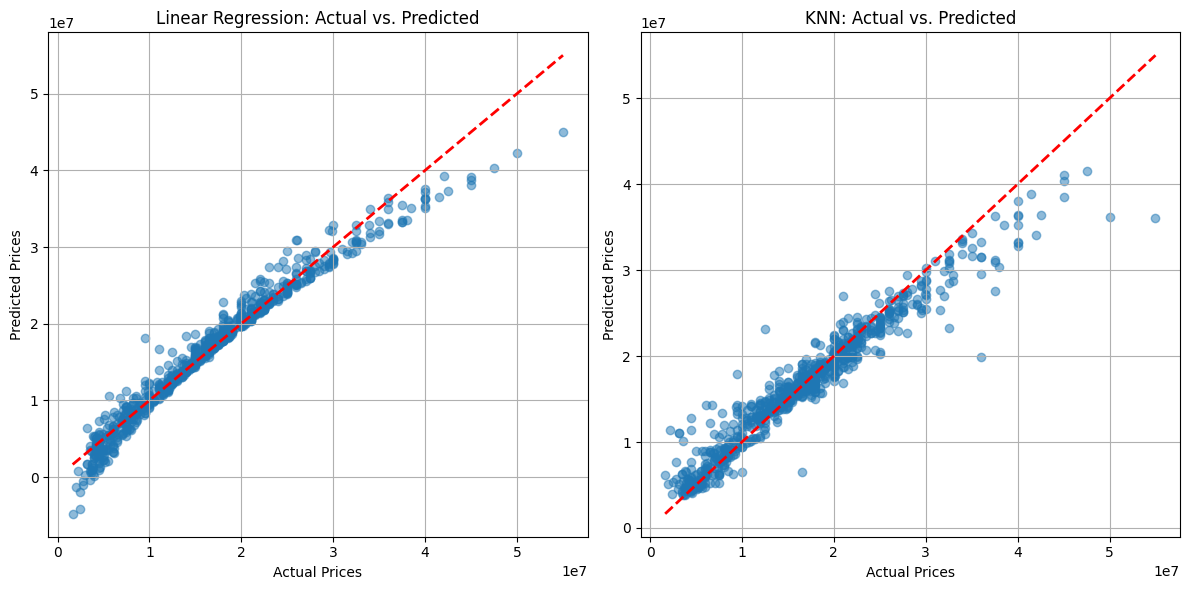

In [ ]:
# Scatter plot for Linear Regression
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)

# Scatter plot for KNN
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_knn, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('KNN: Actual vs. Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)

plt.tight_layout()
plt.show()